<a href="https://colab.research.google.com/github/shonkel1/assignments/blob/main/chennai_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data.shape

(7109, 22)

In [4]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
data = data.drop(columns=['PRT_ID','REG_FEE','COMMIS'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [7]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [8]:
data.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [9]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [10]:
data.AREA.replace('Karapakam','Karapakkam',inplace=True)
data.AREA.replace('Ann Nagar','Anna Nagar',inplace=True)
data.AREA.replace('Adyr','Adyar',inplace=True)
data.AREA.replace('Velchery','Velachery',inplace=True)
data.AREA.replace('Chrompt','Chrompet',inplace=True)
data.AREA.replace('Chrmpet','Chrompet',inplace=True)
data.AREA.replace('KKNagar','KK Nagar',inplace=True)
data.AREA.replace('TNagar','T Nagar',inplace=True)
data.AREA.replace('Chormpet','Chrompet',inplace=True)
data.AREA.replace('Ana Nagar','Anna Nagar',inplace=True)


In [11]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [12]:
data.AREA.isnull().sum()

0

In [13]:
data.INT_SQFT.isnull().sum()

0

In [14]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [15]:
data.DATE_SALE.values[0]

'04-05-2011'

In [16]:
data.DATE_SALE.isnull().sum()

0

In [17]:
data.DATE_BUILD.values[0]

'15-05-1967'

In [18]:
data.DATE_BUILD.isnull().sum()

0

In [19]:
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD)
data.DATE_SALE = pd.to_datetime(data.DATE_SALE)

In [20]:
data.DATE_BUILD = data.DATE_BUILD.dt.year
data.DATE_SALE = data.DATE_SALE.dt.year

In [21]:
data["AGE"]= data.DATE_SALE-data.DATE_BUILD

In [22]:
data = data.drop(columns=['DATE_BUILD','DATE_SALE'])

In [23]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [24]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [25]:
data.DIST_MAINROAD.isnull().sum()

0

In [26]:
data.N_BEDROOM.isnull().sum()

1

In [27]:
data['N_BEDROOM'] = data.N_BEDROOM.fillna(data['N_BEDROOM'].mode()[0])

In [28]:
data.N_BEDROOM.isnull().sum()

0

In [29]:
data.N_BATHROOM.isnull().sum()

5

In [30]:
data['N_BATHROOM'] = data.N_BATHROOM.fillna(data['N_BATHROOM'].mode()[0])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  AGE            7109 non-null   int64  
dtypes: float

In [32]:
data.N_ROOM.isnull().sum()

0

In [33]:
data.N_ROOM = data.N_ROOM.astype('int64')

In [34]:
data.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [35]:
data.SALE_COND.isnull().sum()

0

In [36]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [37]:
data.SALE_COND.replace('AbNormal','Abnormal', inplace=True)
data.SALE_COND.replace('Ab Normal','Abnormal', inplace=True)
data.SALE_COND.replace('AdjLand','Adj Land', inplace=True)
data.SALE_COND.replace('Partiall','Partial', inplace=True)
data.SALE_COND.replace('PartiaLl','Partial', inplace=True)

In [38]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [39]:
data.PARK_FACIL.replace('Noo','No', inplace=True)
data.PARK_FACIL.isnull().sum()

0

In [40]:
data.BUILDTYPE.isnull().sum()

0

In [41]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [42]:
data.BUILDTYPE.replace('Comercial','Commercial', inplace=True)
data.BUILDTYPE.replace('Others','Other', inplace=True)

In [43]:
data.UTILITY_AVAIL.isnull().sum()

0

In [44]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [45]:
data.UTILITY_AVAIL.replace('AllPub','All Pub', inplace=True)

In [46]:
data.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  AGE            7109 non-null   int64  
dtypes: float

In [48]:
data.STREET.isnull().sum()

0

In [49]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [50]:
data.STREET.replace('Pavd','Paved', inplace=True)
data.STREET.replace('NoAccess','No Access', inplace=True)


In [51]:
data.MZZONE.isnull().sum()

0

In [52]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [53]:
data.SALES_PRICE.isnull().sum()

0

In [54]:
data.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [55]:
data.QS_BATHROOM.isnull().sum()

0

In [56]:
data.QS_BEDROOM.isnull().sum()

0

In [57]:
data.QS_ROOMS.isnull().sum()

0

In [58]:
data.QS_OVERALL.isnull().sum()

48

In [59]:
data['QS_OVERALL'] = data.QS_OVERALL.fillna('mean')

In [60]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.33,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.01,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.29,7406250,30


data visualisation

In [61]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])


In [62]:
numeric_data

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,SALES_PRICE,AGE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,7600000,44
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,21717770,11
2,909,70,1.0,1.0,3,4.1,3.8,2.2,13159200,20
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,9630290,22
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,7406250,30
...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,5353000,49
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,10818480,9
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,8351410,28
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,8507000,32


In [63]:
categorical_data

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL
0,Karapakkam,Abnormal,Yes,Commercial,All Pub,Paved,A,4.33
1,Anna Nagar,Abnormal,No,Commercial,All Pub,Gravel,RH,3.765
2,Adyar,Abnormal,Yes,Commercial,ELO,Gravel,RL,3.09
3,Velachery,Family,No,Other,NoSewr,Paved,I,4.01
4,Karapakkam,Abnormal,Yes,Other,All Pub,Gravel,C,3.29
...,...,...,...,...,...,...,...,...
7104,Karapakkam,Adj Land,No,Other,ELO,No Access,RM,2.52
7105,Velachery,Family,Yes,Other,NoSeWa,No Access,RH,3.92
7106,Velachery,Normal Sale,No,House,NoSeWa,Gravel,I,3.84
7107,Karapakkam,Partial,Yes,Commercial,ELO,Paved,RL,4.16


In [64]:
numerical_features=[feature for feature in numeric_data.columns]
numerical_features

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'SALES_PRICE',
 'AGE']

In [65]:
categorical_features=[feature for feature in categorical_data.columns]
categorical_features

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'QS_OVERALL']

eda of numeric features


In [66]:
target=data.SALES_PRICE

Text(0.5, 1.0, 'AGE VS SALES_PRICE')

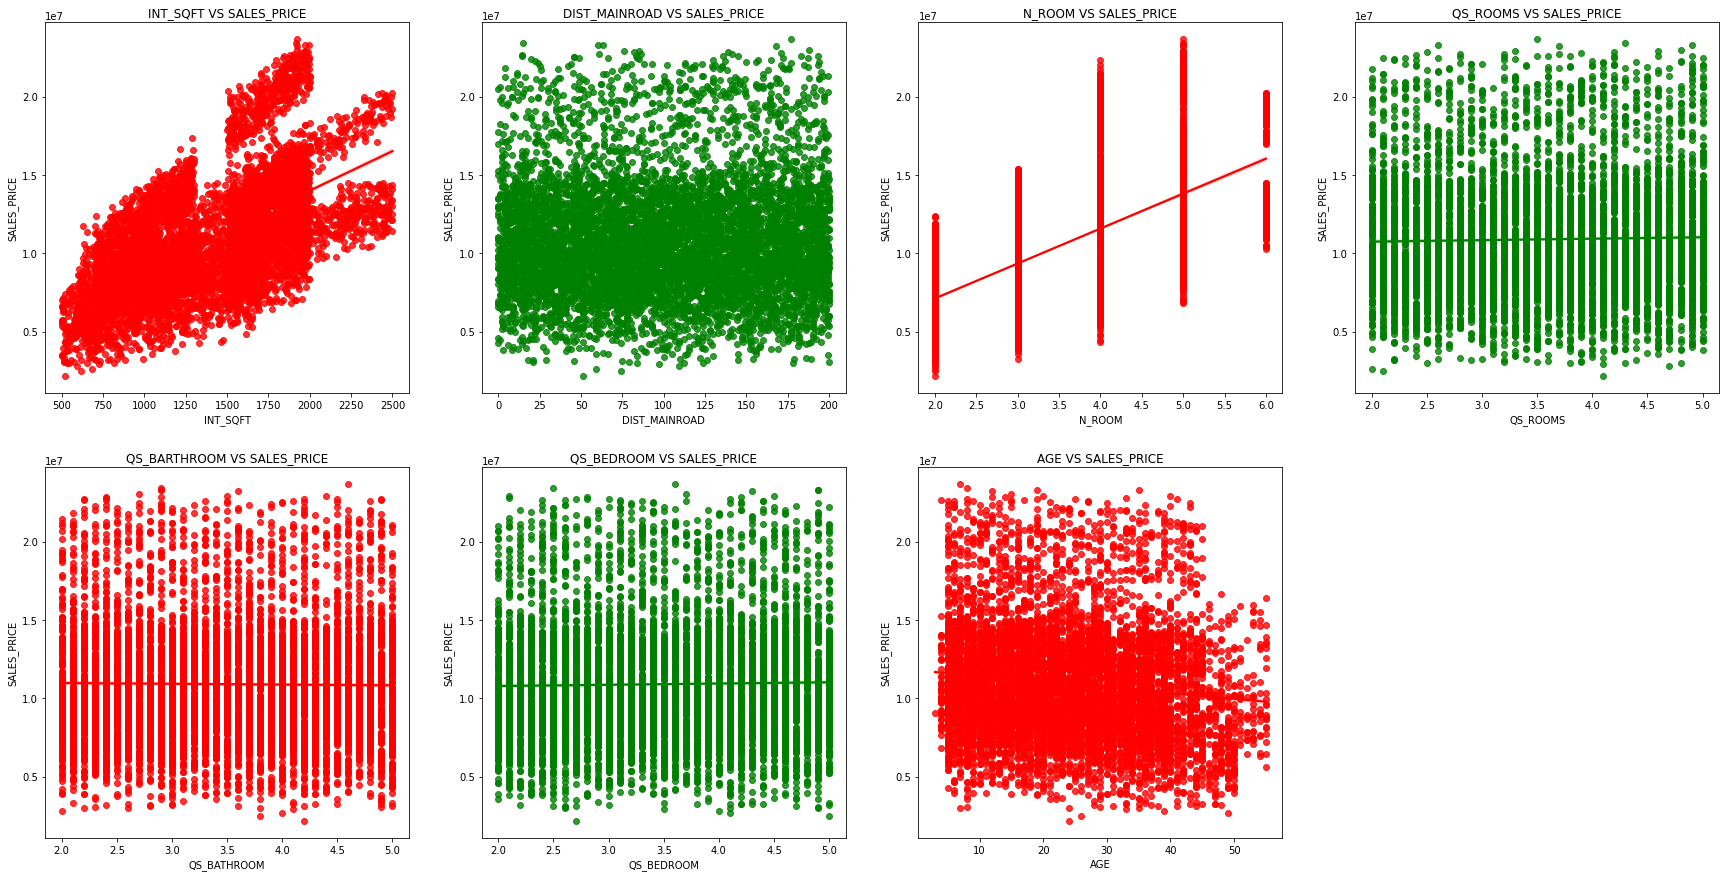

In [67]:
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.regplot(x=data.INT_SQFT,y=target,color="r")
plt.title('INT_SQFT VS SALES_PRICE')
plt.subplot(242)
sns.regplot(x=data.DIST_MAINROAD,y=target,color="g")
plt.title('DIST_MAINROAD VS SALES_PRICE')
plt.subplot(243)
sns.regplot(x=data.N_ROOM,y=target,color="r")
plt.title('N_ROOM VS SALES_PRICE')
plt.subplot(244)
sns.regplot(x=data.QS_ROOMS,y=target,color="g")
plt.title('QS_ROOMS VS SALES_PRICE')
plt.subplot(245)
sns.regplot(x=data.QS_BATHROOM,y=target,color="r")
plt.title('QS_BARTHROOM VS SALES_PRICE')
plt.subplot(246)
sns.regplot(x=data.QS_BEDROOM,y=target,color="g")
plt.title('QS_BEDROOM VS SALES_PRICE')
plt.subplot(247)
sns.regplot(x=data.AGE,y=target,color="r")
plt.title('AGE VS SALES_PRICE')



from the plots we understand that;
1)INT_SQFT is directly proportional to increase in price
2)N_ROOM is directly proportional to increase in price
3)age is inversely proportional to increase in price

eda of categorical features

Text(0.5, 1.0, 'MZZONE VS SALES_PRICE')

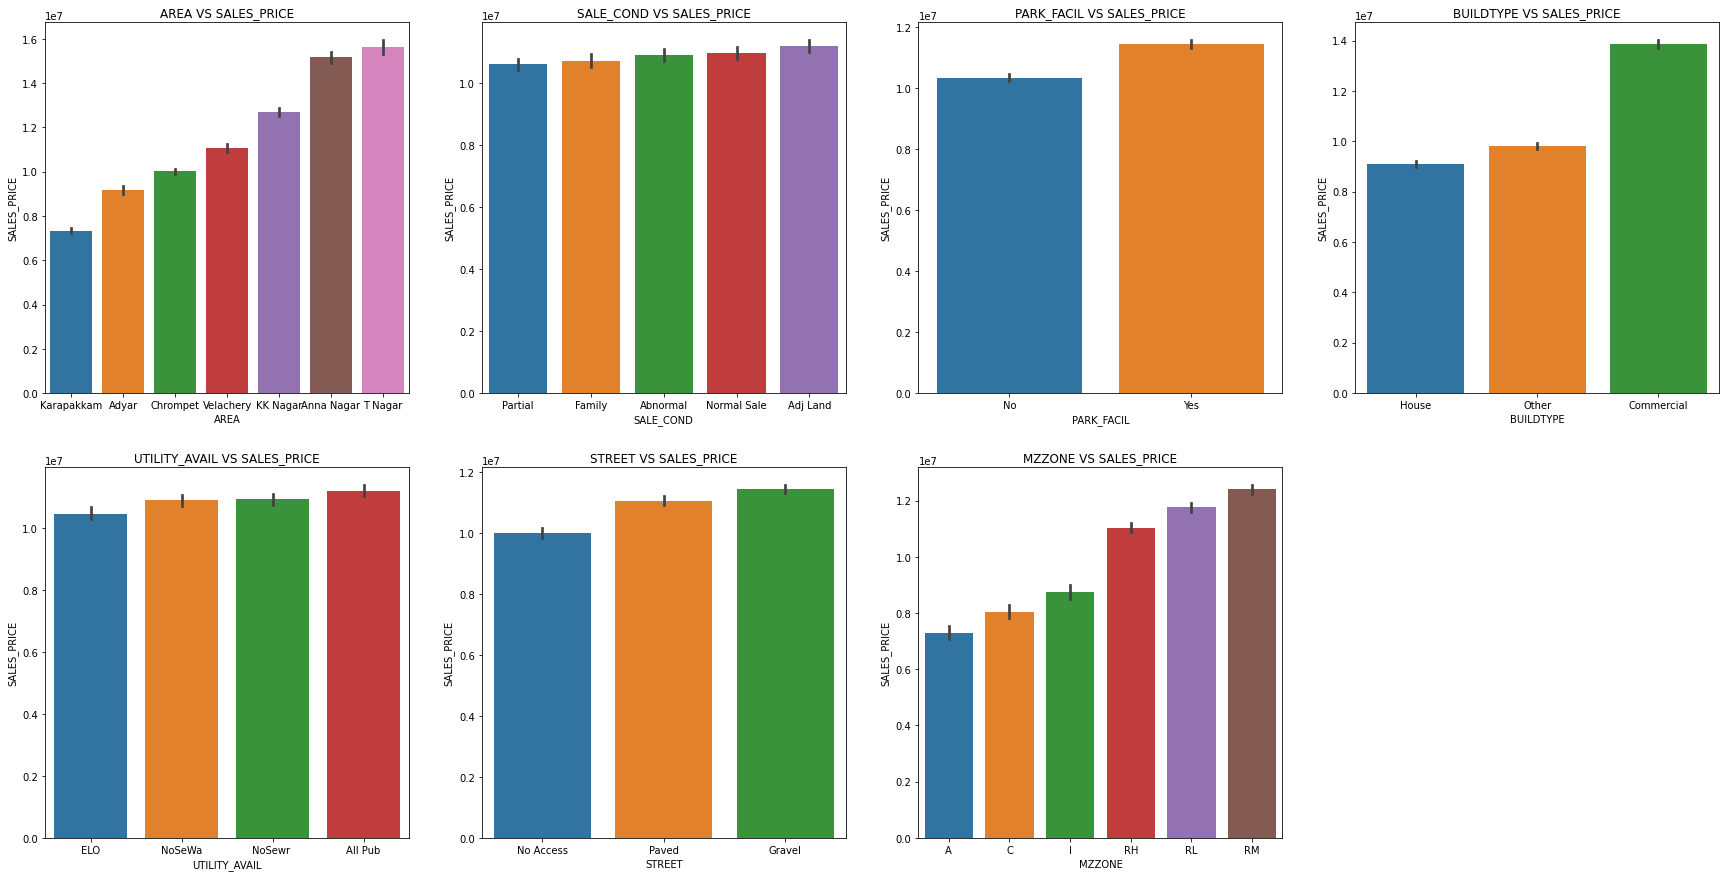

In [68]:
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA VS SALES_PRICE')
plt.subplot(242)
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND VS SALES_PRICE')
plt.subplot(243)
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL VS SALES_PRICE')
plt.subplot(244)
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE VS SALES_PRICE')
plt.subplot(245)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL VS SALES_PRICE')
plt.subplot(246)
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET VS SALES_PRICE')
plt.subplot(247)
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE VS SALES_PRICE')

encoding

In [69]:
data.AREA=data.AREA.map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

In [70]:
data.SALE_COND=data.SALE_COND.map({'Partial':1,'Family':2,'Abnormal':3,'Normal Sale':4,'Adj Land':5})

In [71]:
data.PARK_FACIL=data.PARK_FACIL.map({'No':1,'Yes':2})

In [72]:
one_hot=pd.get_dummies(data.BUILDTYPE).astype(int)
data=data.join(one_hot)

In [73]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.map({'ELO':1,'NoSeWa':2,'NoSewr ':3,'All Pub':4})

In [74]:
data.STREET=data.STREET.map({'No Access':1,'Paved':2,'Gravel':3})

In [75]:
data.MZZONE=data.MZZONE.map({'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6})

In [76]:
data=data.drop(columns=['BUILDTYPE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','DIST_MAINROAD'])
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,1,1004,1.0,1.0,3,3,2,4,2,1,7600000,44,1,0,0
1,6,1986,2.0,1.0,5,3,1,4,3,4,21717770,11,1,0,0
2,2,909,1.0,1.0,3,3,2,1,3,5,13159200,20,1,0,0
3,4,1855,3.0,2.0,5,2,1,3,2,3,9630290,22,0,0,1
4,1,1226,1.0,1.0,3,3,2,4,3,2,7406250,30,0,0,1


In [77]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'Commercial', 'House', 'Other'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   N_BEDROOM      7109 non-null   float64
 3   N_BATHROOM     7109 non-null   float64
 4   N_ROOM         7109 non-null   int64  
 5   SALE_COND      7109 non-null   int64  
 6   PARK_FACIL     7109 non-null   int64  
 7   UTILITY_AVAIL  7109 non-null   int64  
 8   STREET         7109 non-null   int64  
 9   MZZONE         7109 non-null   int64  
 10  SALES_PRICE    7109 non-null   int64  
 11  AGE            7109 non-null   int64  
 12  Commercial     7109 non-null   int64  
 13  House          7109 non-null   int64  
 14  Other          7109 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 833.2 KB


In [79]:
data.N_BATHROOM = data.N_BATHROOM.astype(int)
data.N_BEDROOM = data.N_BEDROOM.astype(int)


linear reg

In [80]:
X=data[['AREA', 'INT_SQFT','UTILITY_AVAIL', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'STREET', 'MZZONE', 'AGE',
       'Commercial', 'House', 'Other']]
y=data['SALES_PRICE']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,)

In [83]:
X_train.shape,X_test.shape

((5687, 14), (1422, 14))

In [84]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [85]:
y_pred=regressor.predict(X_test)
y_pred

array([ 6224345.17405572,  7060686.22082926, 10689859.81507401, ...,
        8746114.04176491,  9690495.79032944,  8667862.6332429 ])

In [86]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
5722,8182525,6.224345e+06
6993,6987500,7.060686e+06
4638,10241290,1.068986e+07
3416,8944400,8.572068e+06
4747,7393940,5.888968e+06
...,...,...
3567,11399205,1.148525e+07
2110,12687420,1.336095e+07
3697,6754500,8.746114e+06
6717,10039720,9.690496e+06


In [87]:
print('rr value is:',metrics.r2_score(y_test,y_pred))

rr value is: 0.9248862749367923


knn

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
a=data.iloc[:,:-1]
b = data.iloc[:,-1]

In [90]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.25,random_state=0)

In [91]:
sc=StandardScaler()
a_train=sc.fit_transform(a_train)
a_test=sc.transform(a_test)


In [92]:
classifier = KNeighborsClassifier(n_neighbors=5 , metric='minkowski' , p=2)
classifier.fit(a_train,b_train)

KNeighborsClassifier()

In [93]:
b_pred = classifier.predict(a_test)
b_pred

array([0, 1, 0, ..., 0, 0, 1])

In [94]:
score=classifier.score(a,b)
score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6714024476016317

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(b_test,b_pred))

[[1176    0]
 [   0  602]]


xgb

In [96]:
import xgboost as xgb

In [97]:
c=data.iloc[:,:-1]
d = data.iloc[:,-1]

In [98]:
data_dmatrix=xgb.DMatrix(data=c,label=d)

In [99]:
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.2,random_state=123)

In [100]:
xg_reg=xgb.XGBClassifier(objective='binary:logistic',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)

In [101]:
xg_reg.fit(c_train,d_train)
d_pred=xg_reg.predict(c_test)

In [102]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(d_test, d_pred)))

XGBoost model accuracy score: 0.9782


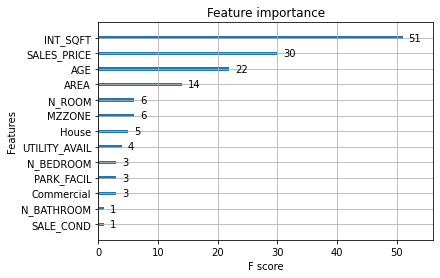

In [103]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()